THIS PROGRAM IS TO CALCULATE ELASTIC COEFFECIENTS OF 2D MATERIALS 

-------------------------------------------
INPUT PARAMETERS:
.............................................
The uniaxial applied strains are [-0.02, -0.015, -0.01, -0.005, 0.0, 0.005, 0.01, 0.015, 0.02]
The uniaxial strain energies are [0.021906, 0.011813, 0.004853, 0.000937, 0.0, 0.001944, 0.006689, 0.014155, 0.024282]
.............................................
The biaxial applied strains are [-0.02, -0.015, -0.01, -0.005, 0.0, 0.005, 0.01, 0.015, 0.02]
The biaxial strain energies are [0.053194, 0.028756, 0.011925, 0.00243, 0.0, 0.004357, 0.015252, 0.032432, 0.055655]
.............................................
supercell constant a is 2.46842  Angstrom and b is 2.46842  Angstrom
--------------------------------------------

The area of the 2D sheet is 5.2766222586824005 Angstrom^2


array for uniaxial strains and energies seems okay
Number of unistrains are 9

array for biaxial strains and energies seems okay
Num

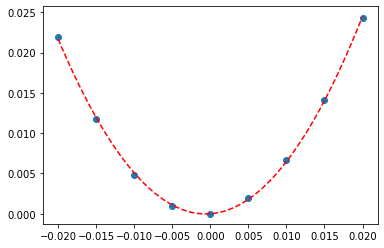



 -------------------------------------------
DOUBLE DIFFRENTIATING EQUATION
-------------------------------------------

115.474198820604
Substituting x = 0 in diffrentiated equation
115.474198820604


-------------------------------------------
NOW CALCULATING STRESS-STRAIN RELATIONSHIP FOR BIAXIAL SYSTEM BY THIRD ORDER FITTING
-------------------------------------------

a is  0.09817666666666688 b is  136.07329008098984 c is  -1.2103907219412796e-05
x = 0.09818 * x + 136.07329 * x^2 + -0.00001


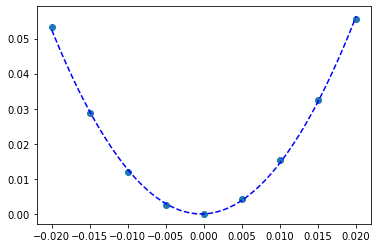



 DOUBLE DIFFRENTIATING EQUATION
272.146580161980
Substituting x = 0 in diffrentiated equation
272.146580161980


-------------------------------------------
 NOW CALCULATING MECHANICAL PROPERTIES
-------------------------------------------

C11 is in N/m   350.605377571002

C12 is in N/m   62.5434273866425


In [99]:
from matplotlib import pyplot
from numpy import arange
import numpy as np
import sympy as sym
from scipy.optimize import curve_fit
# enter uniaxial strain and energies here
U_strain = [-0.020, -0.015, -0.010, -0.005, 0.000, 0.005, 0.010, 0.015, 0.0200];
U_Energy = [0.021906, 0.011813, 0.004853, 0.000937, 0.00000, 0.001944, 0.006689, 0.014155, 0.024282];
# enter Biaxial strain and energies here
B_strain = [-0.020, -0.015, -0.010, -0.005, 0.000, 0.005, 0.010, 0.015, 0.0200];
B_Energy = [0.053194, 0.028756, 0.011925, 0.002430, 0.000000, 0.004357, 0.015252, 0.032432, 0.055655];
lat_Par= [2.46842, 2.46842];
print ('THIS PROGRAM IS TO CALCULATE ELASTIC COEFFECIENTS OF 2D MATERIALS \n')
print ('-------------------------------------------');
print ('INPUT PARAMETERS:');
print ('.............................................');
print ('The uniaxial applied strains are', U_strain);
print ('The uniaxial strain energies are', U_Energy);
print ('.............................................');
print ('The biaxial applied strains are', B_strain);
print ('The biaxial strain energies are', B_Energy);
print ('.............................................');
print ('supercell constant a is', lat_Par[0], ' Angstrom and b is', lat_Par[1], ' Angstrom');
print ('--------------------------------------------');
print ('');
q= lat_Par[0];
Area = ((1.732*q*q)/2);
print ('The area of the 2D sheet is', Area, 'Angstrom^2');
print('\n');
w=len(U_strain);
x=len(U_Energy);
y=len(B_strain);
z=len(B_Energy);
u=w-1;
v=y-1;
if w==x:
    print('array for uniaxial strains and energies seems okay')
    print ('Number of unistrains are', w)
elif w!=x:
    print('!!!!!check number of applied stress and energies in uniaxial!!!!!')

if y==z:
    print('\narray for biaxial strains and energies seems okay')
    print ('Number of biaxial strains are', y)
elif y!=z:
    print('!!!!! check number of applied stress and energies in uniaxial !!!!!')
        
print ('\n\n-------------------------------------------');
print('NOW CALCULATING STRESS-STRAIN RELATIONSHIP FOR UNIAXIAL SYSTEM BY THIRD ORDER FITTING');
print ('-------------------------------------------');
#pyplot.scatter(U_strain, U_Energy)
#pyplot.show()


#pyplot.scatter(B_strain, B_Energy)
#pyplot.show()

##for equation one a1_n +a_2*x_i +a_3*x_i^2 = y_i^2
def objective(x, a, b, c):
	return a * x + b * x**2 + c

x, y = U_strain[:], U_Energy[:]
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
print ('\na is ', a, 'b is ', b, 'c is ', c)
print('x = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(U_strain[0], U_strain[u], 100)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

print ('\n\n -------------------------------------------');
print('DOUBLE DIFFRENTIATING EQUATION');
print ('-------------------------------------------');
x = sym.Symbol('x')
k = a * x + b * x**2 + c
m = (sym.diff(k))
m1 = (sym.diff(m))
print('')
print (m1)
print ('Substituting x = 0 in diffrentiated equation')
n=m1.subs(x,0)
print (n)

print ('\n\n-------------------------------------------');
print('NOW CALCULATING STRESS-STRAIN RELATIONSHIP FOR BIAXIAL SYSTEM BY THIRD ORDER FITTING');
print ('-------------------------------------------');
##for equation one a1_n +a_2*x_i +a_3*x_i^2 = y_i^2
def objective(x, e, f, g):
	return e * x + f * x**2 + g

i, j = B_strain[:], B_Energy[:]
popt, _ = curve_fit(objective, i, j)
e, f, g = popt
print ('\na is ', e, 'b is ', f, 'c is ', g)
print('x = %.5f * x + %.5f * x^2 + %.5f' % (e, f, g))
# plot input vs output
pyplot.scatter(i, j)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(B_strain[0], B_strain[v], 100)
# calculate the output for the range
y_line = objective(x_line, e, f, g)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='blue')
pyplot.show()

print('\n\n DOUBLE DIFFRENTIATING EQUATION');
x = sym.Symbol('x')
l = e * x + f * x**2 + g 
o = (sym.diff(l))
o1 = (sym.diff(o))
print (o1)
print ('Substituting x = 0 in diffrentiated equation')
p=o1.subs(x,0)
print (p)

print ('\n\n-------------------------------------------');
print (' NOW CALCULATING MECHANICAL PROPERTIES')
print ('-------------------------------------------');
c11ev = n/Area;
C11 = c11ev*16.021
print ('\nC11 is in N/m  ', C11)


c= p/Area;
c12ev= (0.5*c)-c11ev
C12 = c12ev*16.021
print ('\nC12 is in N/m  ', C12)
